# Clasificacion Multi Categoria

[Origen de datos, curados para la clase](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Multi%20label%20text%20classification.ipynb)

In [1]:
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\Admin\.conda\envs\austral\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\.conda\envs\austral\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Admin\.conda\envs\austral\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [3]:
from nltk.corpus import stopwords

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
%matplotlib inline

________________________________

In [ ]:
https://github.com/mrthlinh/toxic-comment-classification/blob/master/data/data_train_clean.csv

In [6]:
df = pd.read_csv("./data/06 MultiCategoriasTrain.csv", encoding = "ISO-8859-1")

In [7]:
df.shape

(159571, 8)

In [8]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [10]:
df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
100165,182e8baf67f78c47,:Zak Hansen\nWelcome to Wikipedia! We could re...,0,0,0,0,0,0
21321,3838d8a2b61c3e27,"""\n(e/c)Issues such as poor design or fireproo...",0,0,0,0,0,0
28378,4b1fecb528610157,"""\n\nCopyright problem: Zino Vinnikov\nHello, ...",0,0,0,0,0,0
158091,e8a0cb0e06ece388,It looks like you're actually a Russian or a R...,0,0,0,0,0,0
139324,e9a82ec98e543b7c,""" simply because the NYT obtained some of its ...",0,0,0,0,0,0
133558,ca8341e86c569c6c,Needs a discussion of why it hasn't held empir...,0,0,0,0,0,0
104601,2f9d43e14a6bdf76,"""\n\nSomething """"complex"""" is most certainly g...",0,0,0,0,0,0
141502,f504cda7462c8cad,"""\n\nI'm afraid there is considerable evidence...",0,0,0,0,0,0
51911,8af252fff5b76d04,"""\n\nHello CheapAirJordan, and Welcome to Wiki...",0,0,0,0,0,0
58319,9c1f7a3e8ae08046,This article was nominated for good article re...,0,0,0,0,0,0


In [11]:
df.tail(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159561,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ...",0,0,0,0,0,0
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


________________________________

#### Evaluar la cantidad de comentarios por categoria

In [12]:
df_toxic = df.drop(['id', 'comment_text'], axis=1)

In [13]:
categories = list(df_toxic.columns.values)

In [14]:
counts = []
for i in categories:
    counts.append((i, df_toxic[i].sum()))

In [15]:
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


Text(0.5, 0, 'Categoria')

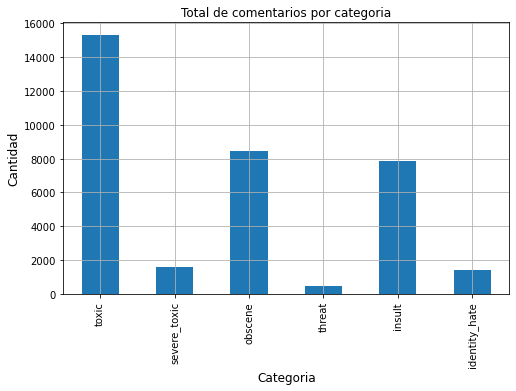

In [16]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Total de comentarios por categoria")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Categoria', fontsize=12)

In [17]:
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()

C:\Users\Admin\.conda\envs\austral\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Categorias')

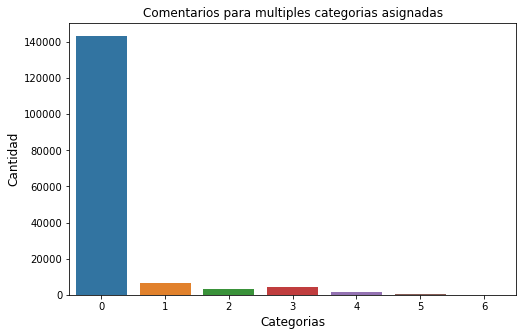

In [18]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Comentarios para multiples categorias asignadas")
plt.ylabel('Cantidad', fontsize=12)
plt.xlabel('Categorias', fontsize=12)

##### Longitud de los comentarios

<AxesSubplot:>

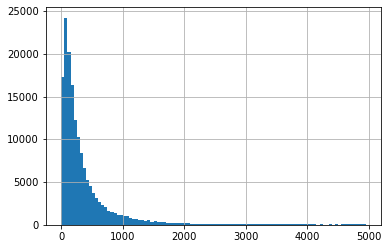

In [19]:
lens = df.comment_text.str.len()
lens.hist(bins = np.arange(0,5000,50))

In [20]:
fltNoLavel = len(df[(df['toxic']==0) & (df['severe_toxic']==0) & (df['obscene']==0) & (df['threat']== 0) & (df['insult']==0) & (df['identity_hate']==0)])
fltPrc = fltNoLavel / len(df)
print('Total de comentarios no rotulados: ' + str(fltNoLavel))
print('Total de comentarios rotulados: ' + str(len(df) - fltNoLavel))
print('Porcentaje de comentarios no rotulados: ' + str(fltPrc))
print('Cantidad de comentarios nulos: ' + str(df['comment_text'].isnull().sum()))

Total de comentarios no rotulados: 143346
Total de comentarios rotulados: 16225
Porcentaje de comentarios no rotulados: 0.8983211235124177
Cantidad de comentarios nulos: 0


In [21]:
print('Ejemplo de comentario:')
df['comment_text'][0]

Ejemplo de comentario:


"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

_________________________

#### Categorias

In [22]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

#### Limpieza de datos

In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [24]:
df['comment_text'] = df['comment_text'].map(lambda com : clean_text(com))

In [25]:
df['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted they were not vandalisms just closure on some gas after i voted at new york dolls fac and please do not remove the template from the talk page since i am retired now 89 205 38 27'

__________________________________

#### Manejo de Datos

In [26]:
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)

In [27]:
X_train = train.comment_text
X_test = test.comment_text
print(X_train.shape)
print(X_test.shape)

(106912,)
(52659,)


_______________________

***OneVsRestClassifier***: También conocida como uno-vs-todos, esta estrategia consiste en ajustar un clasificador por clase.  Como cada clase está representada por uno y un clasificador solamente, es posible obtener conocimiento sobre la clase inspeccionando su clasificador correspondiente. 

In [28]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))),
                ])

In [29]:
for category in categories:
    print('Procesando Categoria: {}'.format(category))
    NB_pipeline.fit(X_train, train[category])
    prediction = NB_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(test[category], prediction)))

Procesando Categoria: toxic
Accuracy: 0.9192350785240889
Procesando Categoria: severe_toxic
Accuracy: 0.9900112041626312
Procesando Categoria: obscene
Accuracy: 0.9515752293055318
Procesando Categoria: threat
Accuracy: 0.9971135038644866
Procesando Categoria: insult
Accuracy: 0.9517271501547694
Procesando Categoria: identity_hate
Accuracy: 0.9910556600011394


In [30]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
                ])

In [31]:
for category in categories:
    print('Procesando Categoria: {}'.format(category))
    SVC_pipeline.fit(X_train, train[category])
    prediction = SVC_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(test[category], prediction)))

Procesando Categoria: toxic
Accuracy: 0.9600068364382157
Procesando Categoria: severe_toxic
Accuracy: 0.9906948479842003
Procesando Categoria: obscene
Accuracy: 0.9788830019559809
Procesando Categoria: threat
Accuracy: 0.9974363356691164
Procesando Categoria: insult
Accuracy: 0.971135038644866
Procesando Categoria: identity_hate
Accuracy: 0.9919861752027194


In [32]:
LogReg_pipeline = Pipeline([
                            ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                            ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
                           ])

In [33]:
for category in categories:
    print('Procesando Categoria: {}'.format(category))
    LogReg_pipeline.fit(X_train, train[category])
    prediction = LogReg_pipeline.predict(X_test)
    print('Accuracy: {}'.format(accuracy_score(test[category], prediction)))

Procesando Categoria: toxic
Accuracy: 0.9548415275641391
Procesando Categoria: severe_toxic
Accuracy: 0.9910746501072941
Procesando Categoria: obscene
Accuracy: 0.9760724662450863
Procesando Categoria: threat
Accuracy: 0.9973793653506523
Procesando Categoria: insult
Accuracy: 0.9687422852693747
Procesando Categoria: identity_hate
Accuracy: 0.991758293928863


______________________